In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

In [14]:
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [21]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [22]:

#Get a list of column names & types for Measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
#View data from 'Measurement' using query 
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [24]:
#Get a list of column names and types
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [25]:
#View data from 'Station' using select query 
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [26]:
# Design a query to retrieve the last 12 months & plotting it  
session.query(func.count(Measurement.date)).all()

[(19550)]

In [27]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results / 02-Ins_Dates using 2016-08-23
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2015-04-23').\
    order_by(Measurement.date).all()
print(results)

[('2015-04-24', 0.07), ('2015-04-24', 0.04), ('2015-04-24', 0.08), ('2015-04-24', 0.25), ('2015-04-24', 0.14), ('2015-04-24', 0.0), ('2015-04-24', 0.37), ('2015-04-25', 0.0), ('2015-04-25', 0.01), ('2015-04-25', 0.0), ('2015-04-25', 0.05), ('2015-04-25', 0.01), ('2015-04-25', 0.04), ('2015-04-26', 0.01), ('2015-04-26', 0.0), ('2015-04-26', 0.0), ('2015-04-26', 0.02), ('2015-04-26', 0.0), ('2015-04-26', 0.05), ('2015-04-27', 0.06), ('2015-04-27', 0.17), ('2015-04-27', 0.65), ('2015-04-27', 3.62), ('2015-04-27', 0.62), ('2015-04-27', None), ('2015-04-27', 0.63), ('2015-04-28', 0.04), ('2015-04-28', 0.09), ('2015-04-28', 0.08), ('2015-04-28', 0.47), ('2015-04-28', 3.26), ('2015-04-29', 0.02), ('2015-04-29', 0.09), ('2015-04-29', 0.03), ('2015-04-29', None), ('2015-04-29', 0.14), ('2015-04-29', None), ('2015-04-29', 0.45), ('2015-04-30', 0.0), ('2015-04-30', 0.03), ('2015-04-30', 0.01), ('2015-04-30', 0.0), ('2015-04-30', 0.0), ('2015-04-30', 0.0), ('2015-04-30', 0.14), ('2015-05-01', 0.06

In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column 
data = {'date': [], 'prcp': []}

for row in results:
    data['date'].append(row.date)
    data['prcp'].append(row.prcp)
    
rain_in_hawaii = pd.DataFrame(data, columns = ['date','prcp'])
rain_in_hawaii.head(14)

,date,prcp
0,2015-04-24,0.07
1,2015-04-24,0.04
2,2015-04-24,0.08
3,2015-04-24,0.25
4,2015-04-24,0.14
5,2015-04-24,0.00
6,2015-04-24,0.37
7,2015-04-25,0.00
8,2015-04-25,0.01
9,2015-04-25,0.00


In [32]:
rain_in_hawaii = rain_in_hawaii.dropna()
rain_in_hawaii.head(14)


,date,prcp
0,2015-04-24,0.07
1,2015-04-24,0.04
2,2015-04-24,0.08
3,2015-04-24,0.25
4,2015-04-24,0.14
5,2015-04-24,0.00
6,2015-04-24,0.37
7,2015-04-25,0.00
8,2015-04-25,0.01
9,2015-04-25,0.00


In [33]:
#Set Index
rain_in_hawaii.set_index('date',drop=True,inplace=True)
rain_in_hawaii.head()

,prcp
date,
2015-04-24,0.07
2015-04-24,0.04
2015-04-24,0.08
2015-04-24,0.25
2015-04-24,0.14


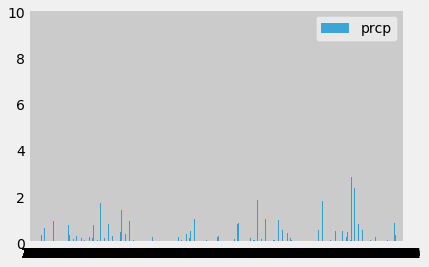

In [34]:
rain_hawaii.plot(kind='bar', alpha=0.75,rot=0)
plt.show()

In [35]:

rain_in_hawaii.describe(percentiles=None, include=None, exclude=None)

,prcp
count,4809.000000
mean,0.198064
std,0.509936
min,0.000000
25%,0.000000
50%,0.020000
75%,0.160000
max,9.640000


In [36]:
rain_in_hawaii = rain_in_hawaii.groupby('date')['prcp'].sum()
rain_in_hawaii

date
2015-04-24    0.95
2015-04-25    0.11
2015-04-26    0.08
2015-04-27    5.75
2015-04-28    3.94
2015-04-29    0.73
2015-04-30    0.18
2015-05-01    2.25
2015-05-02    0.00
2015-05-03    0.00
2015-05-04    0.22
2015-05-05    1.34
2015-05-06    0.05
2015-05-07    0.14
2015-05-08    2.51
2015-05-09    1.28
2015-05-10    1.32
2015-05-11    0.34
2015-05-12    0.09
2015-05-13    0.02
2015-05-14    1.12
2015-05-15    0.85
2015-05-16    0.36
2015-05-17    0.13
2015-05-18    0.66
2015-05-19    0.02
2015-05-20    0.58
2015-05-21    0.93
2015-05-22    0.00
2015-05-23    4.67
              ... 
2017-07-25    0.61
2017-07-26    0.50
2017-07-27    0.01
2017-07-28    0.77
2017-07-29    0.61
2017-07-30    0.30
2017-07-31    0.00
2017-08-01    0.14
2017-08-02    0.30
2017-08-03    0.07
2017-08-04    0.06
2017-08-05    0.06
2017-08-06    0.00
2017-08-07    0.05
2017-08-08    0.44
2017-08-09    0.15
2017-08-10    0.07
2017-08-11    0.00
2017-08-12    0.14
2017-08-13    0.00
2017-08-14    0.31
2017-08

In [37]:
station_count = session.query(func.count(Station.station)).all()
print (station_count)

[(9,)]


In [39]:
active_station_desc = session.query(Measurement.station,
        func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for result in active_station_desc:
    print(result)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [40]:
active_station_first = session.query(Measurement.station, 
        func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
      
print(active_station_first)

('USC00519281', 2772)


In [42]:
monthly_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2015-04-23').\
    order_by(Measurement.date).all()
monthly_temp

[('USC00519397', '2015-04-24', 77.0),
 ('USC00513117', '2015-04-24', 76.0),
 ('USC00514830', '2015-04-24', 77.0),
 ('USC00519523', '2015-04-24', 75.0),
 ('USC00519281', '2015-04-24', 69.0),
 ('USC00511918', '2015-04-24', 69.0),
 ('USC00516128', '2015-04-24', 72.0),
 ('USC00519397', '2015-04-25', 74.0),
 ('USC00513117', '2015-04-25', 74.0),
 ('USC00514830', '2015-04-25', 83.0),
 ('USC00519523', '2015-04-25', 81.0),
 ('USC00519281', '2015-04-25', 73.0),
 ('USC00516128', '2015-04-25', 73.0),
 ('USC00519397', '2015-04-26', 78.0),
 ('USC00513117', '2015-04-26', 75.0),
 ('USC00514830', '2015-04-26', 80.0),
 ('USC00519523', '2015-04-26', 81.0),
 ('USC00519281', '2015-04-26', 78.0),
 ('USC00516128', '2015-04-26', 70.0),
 ('USC00519397', '2015-04-27', 81.0),
 ('USC00513117', '2015-04-27', 73.0),
 ('USC00514830', '2015-04-27', 76.0),
 ('USC00519523', '2015-04-27', 73.0),
 ('USC00519281', '2015-04-27', 69.0),
 ('USC00511918', '2015-04-27', 72.0),
 ('USC00516128', '2015-04-27', 68.0),
 ('USC005193

In [47]:


#Filter by the station with the highest number of observations.
station_ob = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > '2015-04-03').\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_ob

[('USC00519397', 81.0),
 ('USC00519281', 79.0),
 ('USC00516128', 76.0),
 ('USC00513117', 77.0),
 ('USC00519523', 82.0),
 ('USC00514830', 82.0),
 ('USC00517948', 81.0),
 ('USC00511918', 64.0),
 ('USC00518838', 70.0)]

In [48]:
station_ob_df = pd.DataFrame(monthly_temp, columns=['Station', 'date', 'temp'])
station_ob_df.set_index('Station', inplace=True)
station_ob_df

,date,temp
Station,,
USC00519397,2015-04-24,77.0
USC00513117,2015-04-24,76.0
USC00514830,2015-04-24,77.0
USC00519523,2015-04-24,75.0
USC00519281,2015-04-24,69.0
USC00511918,2015-04-24,69.0
USC00516128,2015-04-24,72.0
USC00519397,2015-04-25,74.0
USC00513117,2015-04-25,74.0


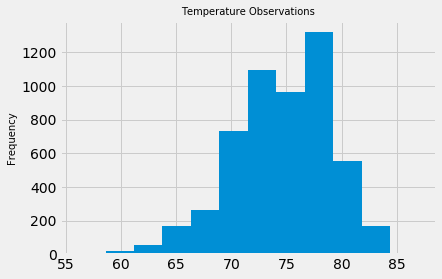

In [53]:
plot_ofrain = station_ob_df['temp'].hist(bins=12)
plot_ofrain.set_title('Temperature Observations', fontsize=10)
plot_ofrain.set_ylabel('Frequency', fontsize=10)
plt.show()

In [54]:
app = Flask(__name__)

In [55]:
@app.route("/")
def welcome():
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation <br/>"
        f"/api/v1.0/stations <br/r>"
        f"/api/v1.0/tobs <br/r>"
        f"/api/v1.0/<start><br/r>"
        f"/api/v1.0/<start>/<end>")

In [56]:
#/api/v1.0/precipitation` / 06-Ins_Jsonify
@app.route("/api/v1.0/precipitation")
def precipitation():
    prcp_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2015-04-03').all()

#Convert the query results to a Dictionary using `date` as the key and `tobs` as the value.    
    all_pcrp = []
    for prcp in prcp_results:
        prcp_dict = {}
        prcp_dict["Date"] = Measurement.date
        pcrp_dict["TOBS"] = Measurement.tobs
        all_prcp.appent(prcp_dict)
    return jsonify(all_prcp) 

In [58]:
@app.route("/api/v1.0/stations")
def stations():

    station_results = session.query(Station.station).all()

    all_stations = list(np.ravel(station_results))

    return jsonify(all_stations)

AssertionError: View function mapping is overwriting an existing endpoint function: stations

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data previous to your 
# trips start date for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

## Optional Challenge Assignment

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
